In [218]:
import pandas as pd

df = pd.read_csv("mental_health_dataset.csv")

In [219]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
0,1,36,Non-binary,Sales,Canada,No,Medium,Yes,Medium,7.1,46,5
1,2,34,Female,Education,UK,Yes,NaN,No,Low,7.5,47,8
2,3,65,Non-binary,Sales,USA,Yes,High,No,Low,8.4,58,10
3,4,34,Male,Other,Australia,No,Low,No,Medium,9.8,30,2
4,5,22,Female,Healthcare,Canada,Yes,Low,No,Medium,4.9,62,5


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   User_ID                  1000 non-null   int64  
 1   Age                      1000 non-null   int64  
 2   Gender                   1000 non-null   object 
 3   Occupation               1000 non-null   object 
 4   Country                  1000 non-null   object 
 5   Mental_Health_Condition  1000 non-null   object 
 6   Severity                 499 non-null    object 
 7   Consultation_History     1000 non-null   object 
 8   Stress_Level             1000 non-null   object 
 9   Sleep_Hours              1000 non-null   float64
 10  Work_Hours               1000 non-null   int64  
 11  Physical_Activity_Hours  1000 non-null   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 93.9+ KB


In [221]:
df.describe(include='all')

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours
count,1000.000000,1000.00000,1000,1000,1000,1000,499,1000,1000,1000.000000,1000.000000,1000.000000
unique,NaN,NaN,4,7,7,2,3,2,3,NaN,NaN,NaN
top,NaN,NaN,Female,Other,Australia,Yes,Low,No,High,NaN,NaN,NaN
freq,NaN,NaN,270,161,160,515,176,505,342,NaN,NaN,NaN
mean,500.500000,41.89200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.095600,54.621000,5.134000
std,288.819436,13.97475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.713861,14.709035,3.081808
min,1.000000,18.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,30.000000,0.000000
25%,250.750000,30.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.600000,42.000000,3.000000
50%,500.500000,42.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.100000,55.000000,5.000000
75%,750.250000,54.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.500000,67.000000,8.000000


### Handling Missing Values

In [222]:
#Check for missing value
df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Occupation                   0
Country                      0
Mental_Health_Condition      0
Severity                   501
Consultation_History         0
Stress_Level                 0
Sleep_Hours                  0
Work_Hours                   0
Physical_Activity_Hours      0
dtype: int64

In [223]:
# Checking the relationship between Severity and Mental_Health_Condition
severity_missing = df[df['Severity'].isnull()]
print(f"Number of entries with missing Severity: {severity_missing.shape[0]}")
print("Mental_Health_Condition distribution in missing Severity:")
print(severity_missing['Mental_Health_Condition'].value_counts())

Number of entries with missing Severity: 501
Mental_Health_Condition distribution in missing Severity:
Mental_Health_Condition
Yes    267
No     234
Name: count, dtype: int64


In [224]:
# Group by 'Mental_Health_Condition' and find the mode (most frequent) of 'Severity' for each group
mode_severity_by_condition = df.groupby('Mental_Health_Condition')['Severity'].apply(lambda x: x.mode()[0])

# Function to apply the imputation
def impute_severity(row):
    if pd.isnull(row['Severity']):
        return mode_severity_by_condition[row['Mental_Health_Condition']]
    else:
        return row['Severity']

# Apply the imputation function to the 'Severity' column
df['Severity'] = df.apply(impute_severity, axis=1)

# Check the result
print(df[['Mental_Health_Condition', 'Severity']].head(10))

  Mental_Health_Condition Severity
0                      No   Medium
1                     Yes      Low
2                     Yes     High
3                      No      Low
4                     Yes      Low
5                     Yes     High
6                      No   Medium
7                     Yes   Medium
8                     Yes      Low
9                      No      Low


### remove duplicated Rows

In [225]:
df.drop_duplicates(inplace=True)

### Outlier Detection and Removal

In [226]:
import numpy as np
import pandas as pd

# Example numerical columns to apply IQR
numerical_columns = ['Age', 'Sleep_Hours', 'Work_Hours', 'Physical_Activity_Hours']

# Function to identify and remove outliers based on IQR
def handle_outliers(df, columns):
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        min_val = df[col].min()
        max_val = df[col].max()
        Q1 = df[col].quantile(0.25)
        Q2 = df[col].median()  # 50th percentile
        Q3 = df[col].quantile(0.75)
        
        # Calculate the IQR
        IQR = Q3 - Q1
        
        # Define lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"Column: {col}")
        print(f"Min: {min_val}, 25% (Q1): {Q1}, 50% (Median): {Q2}, 75% (Q3): {Q3}, Max: {max_val}, IQR: {IQR}")
        print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
        print(f"Outliers in {col}: {outliers.shape[0]}")
        
        # Cap outliers to the boundaries (if you prefer capping)
        df[col] = np.clip(df[col], lower_bound, upper_bound)
    
    return df

# Apply the function to handle outliers in the dataset
df = handle_outliers(df, numerical_columns)

# Display cleaned data
print("Cleaned Data after handling outliers:")
print(df[numerical_columns].head())


Column: Age
Min: 18, 25% (Q1): 30.0, 50% (Median): 42.0, 75% (Q3): 54.0, Max: 65, IQR: 24.0
Lower Bound: -6.0, Upper Bound: 90.0
Outliers in Age: 0
Column: Sleep_Hours
Min: 4.0, 25% (Q1): 5.6, 50% (Median): 7.1, 75% (Q3): 8.5, Max: 10.0, IQR: 2.9000000000000004
Lower Bound: 1.2499999999999991, Upper Bound: 12.850000000000001
Outliers in Sleep_Hours: 0
Column: Work_Hours
Min: 30, 25% (Q1): 42.0, 50% (Median): 55.0, 75% (Q3): 67.0, Max: 80, IQR: 25.0
Lower Bound: 4.5, Upper Bound: 104.5
Outliers in Work_Hours: 0
Column: Physical_Activity_Hours
Min: 0, 25% (Q1): 3.0, 50% (Median): 5.0, 75% (Q3): 8.0, Max: 10, IQR: 5.0
Lower Bound: -4.5, Upper Bound: 15.5
Outliers in Physical_Activity_Hours: 0
Cleaned Data after handling outliers:
   Age  Sleep_Hours  Work_Hours  Physical_Activity_Hours
0   36          7.1          46                        5
1   34          7.5          47                        8
2   65          8.4          58                       10
3   34          9.8          30    

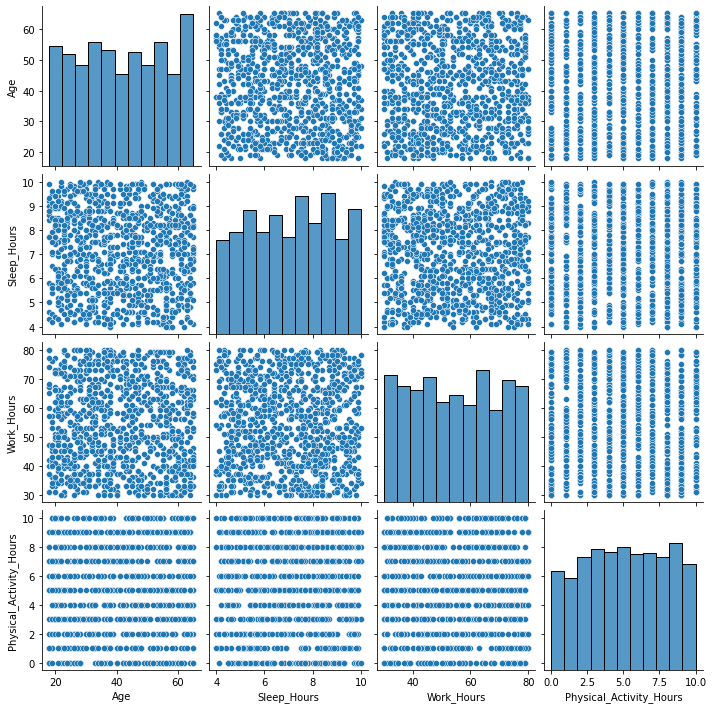

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot matric
sns.pairplot(df[numerical_columns])

# Show the plot
plt.show()


### Encoding Categorical Variables

In [228]:
from sklearn.preprocessing import LabelEncoder
# Identifying categorical columns
categorical_columns = ['Gender', 'Occupation', 'Country', 
                    'Mental_Health_Condition', 'Severity', 
                    'Consultation_History', 'Stress_Level']

# Label Encoding for binary columns
le = LabelEncoder()
binary_columns = ['Mental_Health_Condition', 'Consultation_History']

for col in binary_columns:
    df[col] = le.fit_transform(df[col])
    print(f"Encoded {col}:")
    print(df[col].value_counts(), "\n")

# Ordinal Encoding for Severity and Stress_Level
severity_order = {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3}
stress_level_order = {'Low': 0, 'Medium': 1, 'High': 2}
df['Severity_Encoded'] = df['Severity'].map(severity_order)
df['Stress_Level_Encoded'] = df['Stress_Level'].map(stress_level_order)

print("Encoded Severity and Stress_Level:")
print(df[['Severity', 'Severity_Encoded', 'Stress_Level', 'Stress_Level_Encoded']].head())


Encoded Mental_Health_Condition:
Mental_Health_Condition
1    515
0    485
Name: count, dtype: int64 

Encoded Consultation_History:
Consultation_History
0    505
1    495
Name: count, dtype: int64 

Encoded Severity and Stress_Level:
  Severity  Severity_Encoded Stress_Level  Stress_Level_Encoded
0   Medium                 2       Medium                     1
1      Low                 1          Low                     0
2     High                 3          Low                     0
3      Low                 1       Medium                     1
4      Low                 1       Medium                     1


In [229]:
# Ordinal Encoding for Gender, Occupation, Country
gender_order = {'Non-binary':0, 'Prefer not to say':1,'Male':2,'Female':3}
occupation_order = {'IT':0, 'Finance':1,'Healthcare':2,'Education':3,'Engineering':4,'Sales':5,'Other':6}
country_order = {'USA':0,'India':1,'UK':2,'Canada':3,'Australia':4,'Germany':5,'Other':6}

df['Gender_Encoded'] = df['Gender'].map(gender_order)
df['Occupation_Encoded'] = df['Occupation'].map(occupation_order)
df['Country_Encoded'] = df['Country'].map(country_order)

print(df[['Gender', 'Gender_Encoded', 'Occupation', 'Occupation_Encoded','Country', 'Country_Encoded']].head())

       Gender  Gender_Encoded  Occupation  Occupation_Encoded    Country  \
0  Non-binary               0       Sales                   5     Canada   
1      Female               3   Education                   3         UK   
2  Non-binary               0       Sales                   5        USA   
3        Male               2       Other                   6  Australia   
4      Female               3  Healthcare                   2     Canada   

   Country_Encoded  
0                3  
1                2  
2                0  
3                4  
4                3  


In [230]:
df.head()

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Severity_Encoded,Stress_Level_Encoded,Gender_Encoded,Occupation_Encoded,Country_Encoded
0,1,36,Non-binary,Sales,Canada,0,Medium,1,Medium,7.1,46,5,2,1,0,5,3
1,2,34,Female,Education,UK,1,Low,0,Low,7.5,47,8,1,0,3,3,2
2,3,65,Non-binary,Sales,USA,1,High,0,Low,8.4,58,10,3,0,0,5,0
3,4,34,Male,Other,Australia,0,Low,0,Medium,9.8,30,2,1,1,2,6,4
4,5,22,Female,Healthcare,Canada,1,Low,0,Medium,4.9,62,5,1,1,3,2,3


### Normalization/Scaling

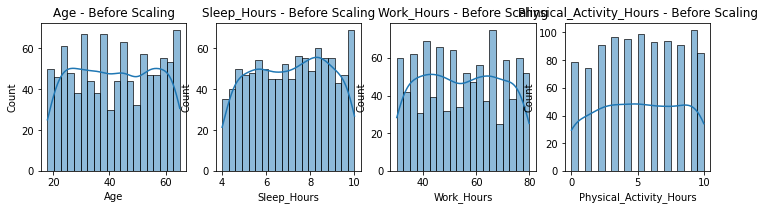

In [231]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# Plot histograms before scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i)
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} - Before Scaling')

In [232]:
# Initialize the scaler
scaler = StandardScaler()

# Scale the numerical features
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
# Displaying the scaled features
print("Scaled Numerical Features:")
print(df[numerical_columns].head())

Scaled Numerical Features:
        Age  Sleep_Hours  Work_Hours  Physical_Activity_Hours
0 -0.421829     0.002569   -0.586396                -0.043503
1 -0.565015     0.236077   -0.518376                 0.930439
2  1.654381     0.761470    0.229838                 1.579733
3 -0.565015     1.578748   -1.674707                -1.017444
4 -1.424137    -1.281725    0.501915                -0.043503


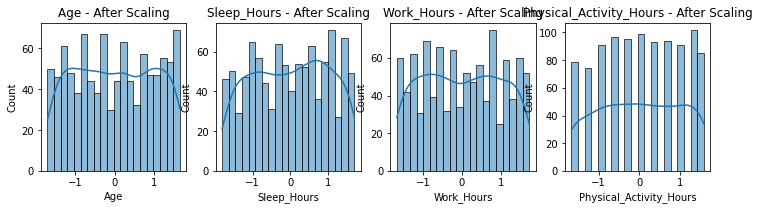

In [233]:

# Plot histograms after scaling
plt.figure(figsize=(12, 6))
for i, feature in enumerate(numerical_columns, 1):
    plt.subplot(2, 4, i + len(numerical_columns))
    sns.histplot(df[feature], kde=True, bins=20)
    plt.title(f'{feature} - After Scaling')
    

### Correlation Check

In [234]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['number'])

# Compute the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                          User_ID       Age  Mental_Health_Condition  \
User_ID                  1.000000 -0.022400                -0.039921   
Age                     -0.022400  1.000000                 0.010689   
Mental_Health_Condition -0.039921  0.010689                 1.000000   
Consultation_History     0.022584 -0.024420                 0.024312   
Sleep_Hours              0.057434 -0.043114                -0.026555   
Work_Hours               0.000734 -0.013825                 0.037317   
Physical_Activity_Hours  0.008222  0.052679                 0.008438   
Severity_Encoded         0.046565  0.015969                -0.029823   
Stress_Level_Encoded     0.039795 -0.003609                 0.048384   
Gender_Encoded           0.005766  0.013389                 0.024697   
Occupation_Encoded      -0.022729 -0.040243                 0.019303   
Country_Encoded         -0.004964  0.048108                -0.074463   

                         Consultation_History  Sleep_Hours  Wor

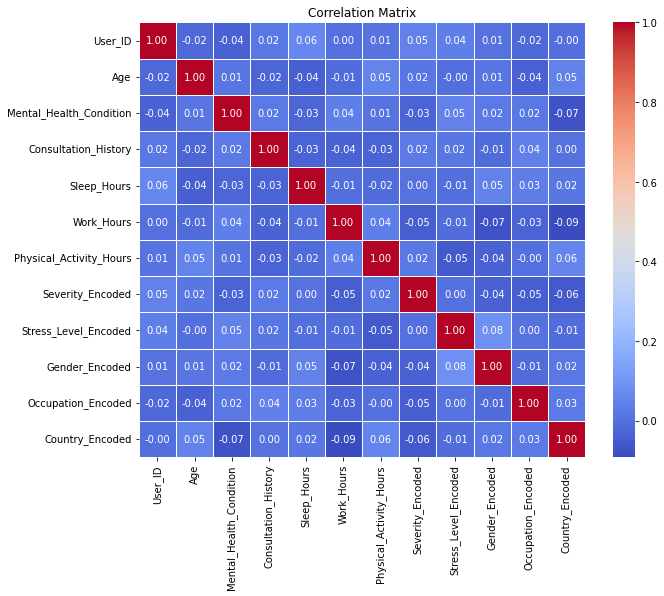

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [236]:
df.head(10)

,User_ID,Age,Gender,Occupation,Country,Mental_Health_Condition,Severity,Consultation_History,Stress_Level,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Severity_Encoded,Stress_Level_Encoded,Gender_Encoded,Occupation_Encoded,Country_Encoded
0,1,-0.421829,Non-binary,Sales,Canada,0,Medium,1,Medium,0.002569,-0.586396,-0.043503,2,1,0,5,3
1,2,-0.565015,Female,Education,UK,1,Low,0,Low,0.236077,-0.518376,0.930439,1,0,3,3,2
2,3,1.654381,Non-binary,Sales,USA,1,High,0,Low,0.761470,0.229838,1.579733,3,0,0,5,0
3,4,-0.565015,Male,Other,Australia,0,Low,0,Medium,1.578748,-1.674707,-1.017444,1,1,2,6,4
4,5,-1.424137,Female,Healthcare,Canada,1,Low,0,Medium,-1.281725,0.501915,-0.043503,1,1,3,2,3
5,6,1.582788,Non-binary,IT,UK,1,High,0,High,-0.464447,-1.402629,-1.666739,3,2,0,0,2
6,7,-1.137763,Female,Engineering,UK,0,Medium,0,Medium,-1.164971,0.229838,0.281144,2,1,3,4,2
7,8,1.081634,Male,IT,UK,1,Medium,1,High,-1.690364,0.161818,1.255086,2,2,2,0,2
8,9,-1.209356,Male,Education,USA,1,Low,0,Medium,-0.230939,0.842013,1.255086,1,1,2,3,0
9,10,1.654381,Non-binary,Healthcare,India,0,Low,1,Low,1.053355,0.161818,0.281144,1,0,0,2,1


### Clean Dataset

In [237]:
# Dropping original categorical columns
df = df.drop(columns=['Gender', 'Occupation', 'Country','Severity', 'Stress_Level'])
df.head(10)

,User_ID,Age,Mental_Health_Condition,Consultation_History,Sleep_Hours,Work_Hours,Physical_Activity_Hours,Severity_Encoded,Stress_Level_Encoded,Gender_Encoded,Occupation_Encoded,Country_Encoded
0,1,-0.421829,0,1,0.002569,-0.586396,-0.043503,2,1,0,5,3
1,2,-0.565015,1,0,0.236077,-0.518376,0.930439,1,0,3,3,2
2,3,1.654381,1,0,0.761470,0.229838,1.579733,3,0,0,5,0
3,4,-0.565015,0,0,1.578748,-1.674707,-1.017444,1,1,2,6,4
4,5,-1.424137,1,0,-1.281725,0.501915,-0.043503,1,1,3,2,3
5,6,1.582788,1,0,-0.464447,-1.402629,-1.666739,3,2,0,0,2
6,7,-1.137763,0,0,-1.164971,0.229838,0.281144,2,1,3,4,2
7,8,1.081634,1,1,-1.690364,0.161818,1.255086,2,2,2,0,2
8,9,-1.209356,1,0,-0.230939,0.842013,1.255086,1,1,2,3,0
9,10,1.654381,0,1,1.053355,0.161818,0.281144,1,0,0,2,1


In [238]:
!pip install scipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split

# First, split the data into Group A (90%) and Group B (10%) for validation
train_val_data, validation_data = train_test_split(df, test_size=0.1, random_state=42)

# Then, split Group A into train and test datasets (90% for training and 10% for testing)
train_data, test_data = train_test_split(train_val_data, test_size=0.1, random_state=42)



In [240]:
from scipy.io import arff
import pandas as pd

# Function to convert DataFrame to ARFF format and save
def save_to_arff(df, filename, relation_name="data"):
    with open(filename, 'w') as f:
        # Write the ARFF header
        f.write(f"@relation {relation_name}\n\n")
        
        # Define attributes
        for col in df.columns:
            f.write(f"@attribute {col} real\n")
        
        # Write the data section
        f.write("\n@data\n")
        for row in df.values:
            f.write(",".join(map(str, row)) + "\n")


save_to_arff(train_data, 'train_data.arff', "Mental_Health_train_data")
save_to_arff(test_data, 'test_data.arff',"Mental_Health_test_data")
save_to_arff(validation_data, 'validation_data.arff', "Mental_Health_vali_data")
